In [22]:
import pandas as pd
file_path = "combined_countries.xlsx"  # Update this if needed
df = pd.read_excel(file_path)
df.columns

Index(['company_id', 'company_name', 'hit_url', 'doc_score', 'company_size',
       'sectors', 'sub_industries', 'text_length_characters', 'url', 'snippet',
       'countries_from_text'],
      dtype='object')

C:\Users\grace\AppData\Local\Temp\ipykernel_39064\3625098753.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_countries['countries_from_text'], rotation=45, ha='right')
C:\Users\grace\AppData\Local\Temp\ipykernel_39064\3625098753.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_countries['countries_from_text'], rotation=45, ha='right')
C:\Users\grace\AppData\Local\Temp\ipykernel_39064\3625098753.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_countries['countries_from_text'], rotation=45, ha='right')
C:\Users\grace\AppData\Local\Temp\ipykernel_39064\3625098753.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after s

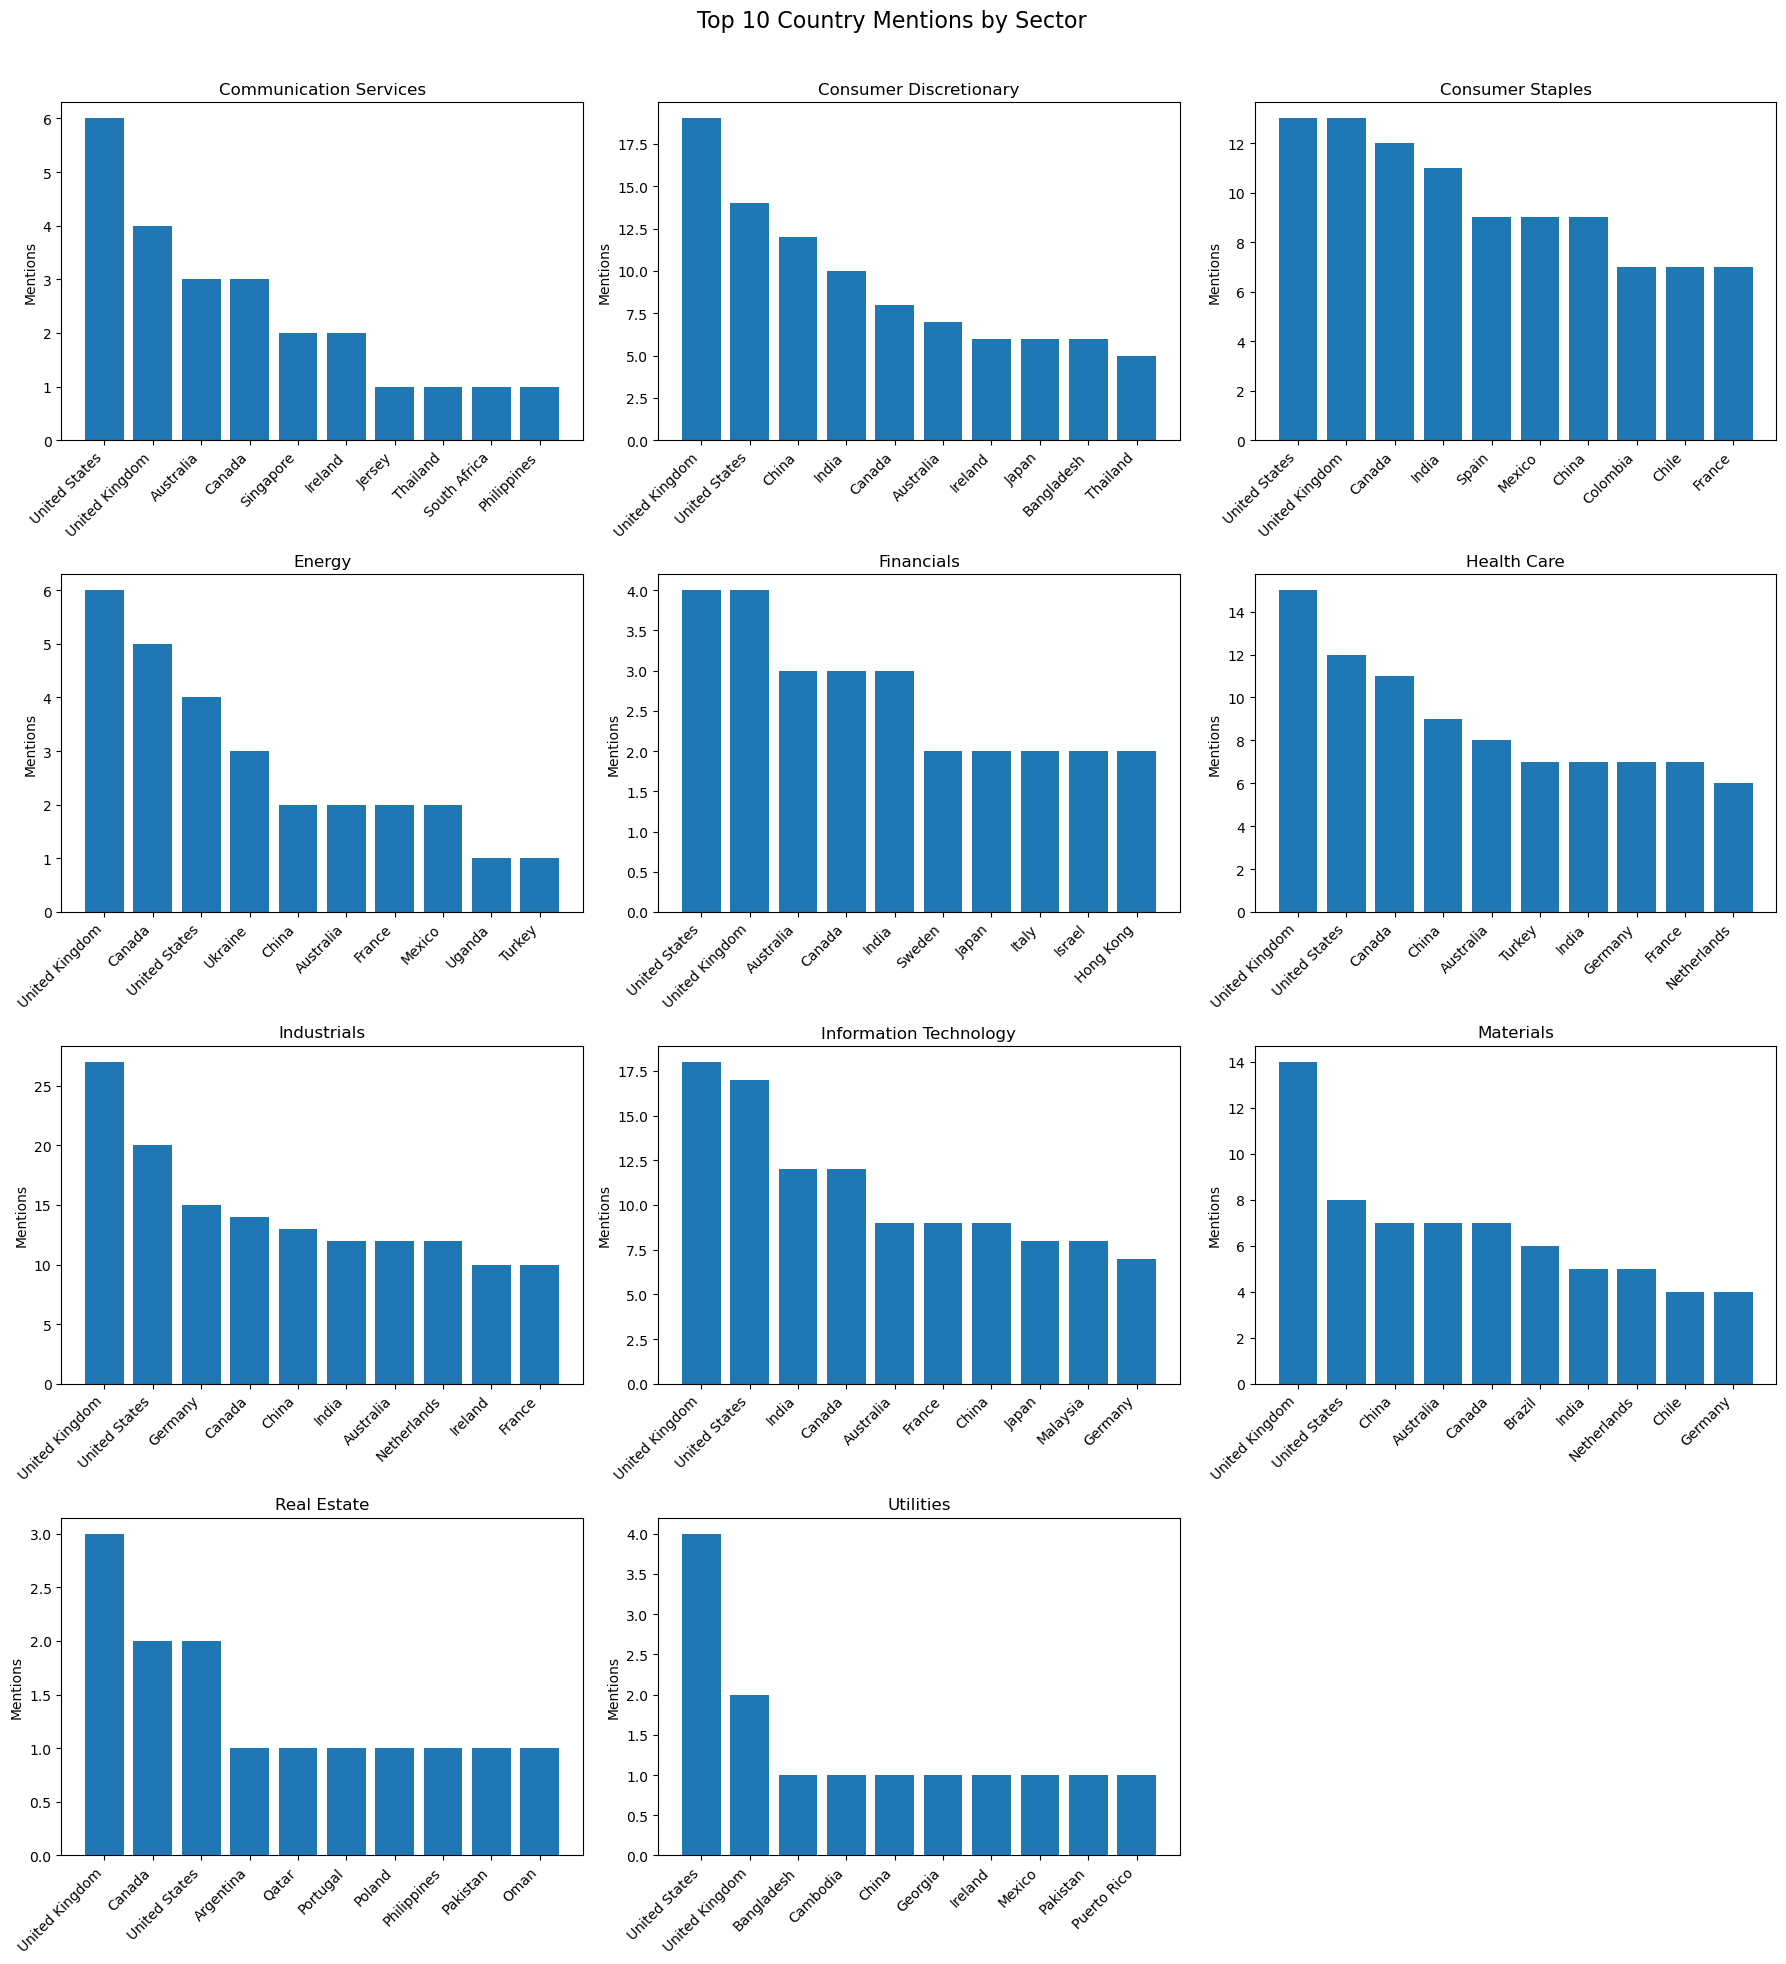

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

<Figure size 640x480 with 0 Axes>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import Counter

df['countries_from_text'] = df['countries_from_text'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and x.startswith("[") else [])

# Expand sectors and explode for multiple sectors per row
df['sectors'] = df['sectors'].fillna('').apply(lambda x: [s.strip() for s in x.split(';') if s.strip()])
df = df.explode('sectors')
df = df[df['sectors'] != '']  # Remove empty sectors

# Explode countries
df = df.explode('countries_from_text')
df = df[df['countries_from_text'].notna()]  # Drop NaNs

# Group by sector and count country mentions
sector_country_counts = df.groupby(['sectors', 'countries_from_text']).size().reset_index(name='count')

# Plotting
sectors = sector_country_counts['sectors'].unique()
n_sectors = len(sectors)
n_cols = 3
n_rows = (n_sectors + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, sector in enumerate(sectors):
    ax = axes[i]
    sector_data = sector_country_counts[sector_country_counts['sectors'] == sector]
    top_countries = sector_data.sort_values('count', ascending=False).head(10)
    ax.bar(top_countries['countries_from_text'], top_countries['count'])
    ax.set_title(sector)
    ax.set_ylabel('Mentions')
    ax.set_xticklabels(top_countries['countries_from_text'], rotation=45, ha='right')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Top 10 Country Mentions by Sector", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
plt.savefig()


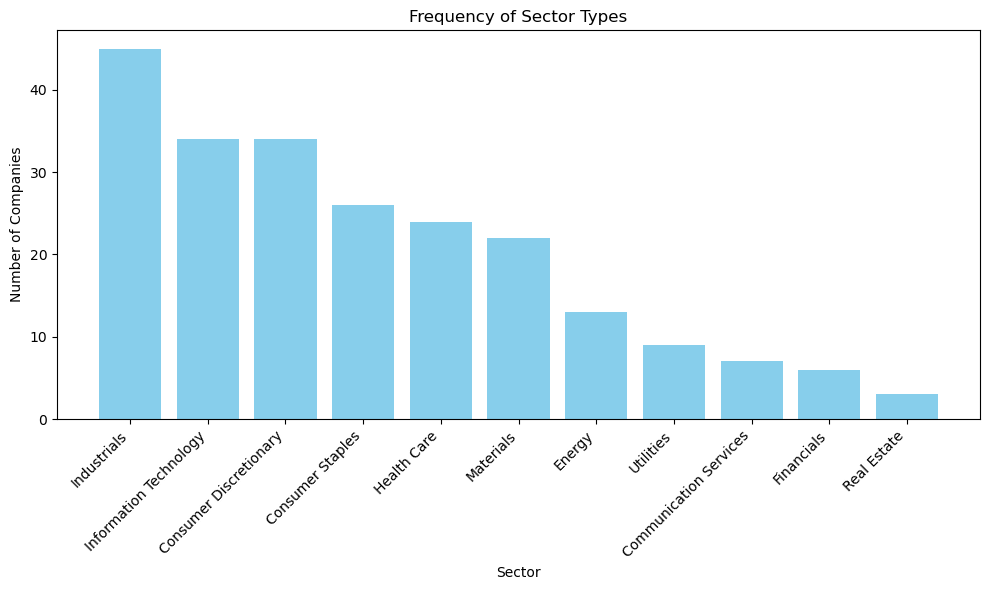

In [26]:
df_sectors = df.dropna(subset=["sectors"])

# Split sectors by semicolon and flatten the list
all_sectors = df_sectors["sectors"].str.split(";").explode()

# Count the frequency of each sector
sector_counts = all_sectors.value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(sector_counts.index, sector_counts.values, color='skyblue')

# Label the chart
plt.title("Frequency of Sector Types")
plt.xlabel("Sector")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

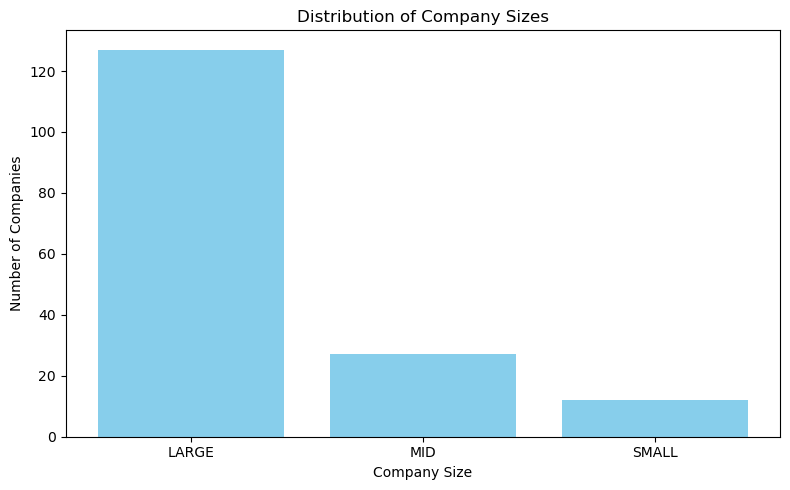

In [20]:
size_counts = df['company_size'].value_counts()

# Plot as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(size_counts.index, size_counts.values, color='skyblue')

# Add title and axis labels
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Number of Companies')

plt.tight_layout()
plt.show()